# Pesquisa pelo grafo

In [7]:
mapa_metabolico ={
    #Glicólise
    "glicose": {
        "glicose-6-fosfato": {"label": "Hexocinase"}
    },
    
    "glicose-6-fosfato": {
        "frutose-6-fosfato": {"label": "Fosfo-hexose-isomerase"}
    },
    
    "frutose-6-fosfato": { 
        "glicose-6-fosfato": {"label": ""},
        "frutose-1,6-bisfosfato": {"label": "fosfofrutocinase 1"}
    },
    
    "frutose-1,6-bisfosfato": {
        "gliceraldeído-3-fosfato + di-hidroxiacetona-fosfato": {"label": "aldolase"}
    },

    "gliceraldeído-3-fosfato + di-hidroxiacetona-fosfato": {
        "frutose-1,6-bisfosfato": {"label": ""},
        "(2) gliceraldeído-3-fosfato": {"label": "triose-fosfato-isomerase"}
    },

    "(2) gliceraldeído-3-fosfato": {
        "gliceraldeído-3-fosfato + di-hidroxiacetona-fosfato": {"label": ""},
        "(2) 1,3-bisfosfoglicerato": {"label": "gliceraldeido-3-fosfato-desidrogenase"}
    },

    "(2) 1,3-bisfosfoglicerato": {
        "(2) gliceraldeído-3-fosfato": {"label": ""},
        "(2) 3-fosfoglicerato": {"label": "fosfoglicerato-cinase"}
    },

    "(2) 3-fosfoglicerato": {
        "(2) 1,3-bisfosfoglicerato": {"label": ""},
        "(2) 2-fosfoglicerato": {"label": "fosfoglicerato-mutase"}
    },

    "(2) 2-fosfoglicerato":{
        "(2) 3-fosfoglicerato": {"label": ""},
        "(2) fosfoenolpiruvato": {"label": "enolase"}
    },

    "(2) fosfoenolpiruvato": {
        "(2) 2-fosfoglicerato": {"label": ""},
        "(2) piruvato": {"label": "piruvato-cinase"}
    },
    #Fermentação 

    "(2) piruvato": {"Lactato": {"label": "Lática, Lactato desidrogenase"},
        "NAD+": {"label": "Lactato desidrogenase"},
        "Acetaldeído": {"label": "Alcóolica, Piruvato descarboxilase"},
        "CO2": {"label": "Alcóolica, Piruvato descarvoxilase"},
        "Acetil-CoA" : "Piruvato-Desidrogenase"
    },
    "Acetaldeído": {
        "Etanol": {"label": "Álcool desidrogenase"},
        "NAD+": {"label": "Álcool desidrogenase"}
    },

    #Ciclo de Krebs
    "Acetil-CoA": {
        "Citrato": {"label": "Citrato-Sintetase "},
        "Malonil-CoA": {"label": "acetil-CoA carboxilase (ACC)"},
        "Palmitato": {"label": "Ácido graxo sintase"}
    },
    "Citrato": {
        "cis-Aconitato": {"label": "Aconitase"},
        "Oxalacetato": {"ATP-Citrato Liase"},
        "Acetil-CoA": {"label": "ATP-Citrato Liase"}
    },
    "cis-Aconitato":{
        "Isocitrato": {"label": "Aconitase"},
        
    },
    "Isocitrato": {
        "Oxalosuccinato": {"label":"Isocitrato-Desidrogenase"},
    
    },
    "Oxalosuccinato":{
        "a-Cetoglutarato": {"label": "Isocitrato-Desidrogenase"},
    
    },
    "a-Cetoglutarato": {
        "Succinil-CoA": {"label": "a-Cetoglutarato-Desidrogenase"},
    
    },
    "Succinil-CoA": {
        "Succinato": {"label": "Succinil-CoA-Sintetase"},
        
    },
    "Succinato": {
        "Fumarato": {"label": "Succinato-Desidrogenase"},
        
    },
    "Fumarato": {
        "L-Malato": {"label": "Fumarase"},
        
    }, 
    "L-Malato": {
        "Oxaloacetato": {"label": "Malato-Desidrogenase"},
        
    },
    "Oxaloacetato": {
        "Citrato": {"label": ""},
        
    },
    
    #Síntese de ácidos graxos:
    "Malonil-CoA": {
        "Palmitato": {"label": "Ácido graxo sintase"}
    }
    
}

# Percorre o dicionário por meio de uma busca em largura
 

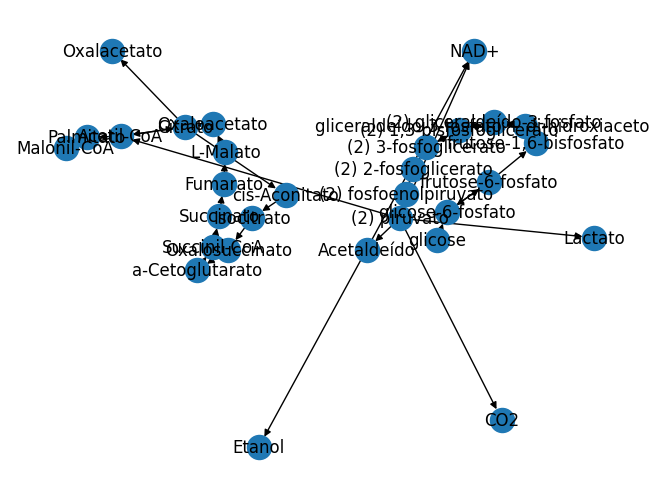

In [33]:
import networkx as nx
from random import randint
SEMENTE_ALEATORIA = randint(0, 10000)
g = nx.DiGraph(mapa_metabolico)
posicao = nx.spring_layout(g, seed=SEMENTE_ALEATORIA)
nx.draw(g, with_labels=True)

In [ ]:
def get_reaction_pathway(start, end):
    """Retorna o caminho da reação metabólica de um ponto inicial a um ponto final sem usar recursividade."""
    def find_path(current, path):
        if current == end:
            return path
        if current not in mapa_metabolico:
            
            return None
        for next_metabolite, reaction in mapa_metabolico[current].items():
            if isinstance(reaction, dict) and 'label' in reaction:
                next_path = find_path(next_metabolite, path + [next_metabolite])
                if next_path is not None:
                    return next_path    
    return find_path(start, [start])
get_reaction_pathway("glicose", "Palmitato")  # Exemplo de uso

RecursionError: maximum recursion depth exceeded